In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
import itertools
from z3 import *

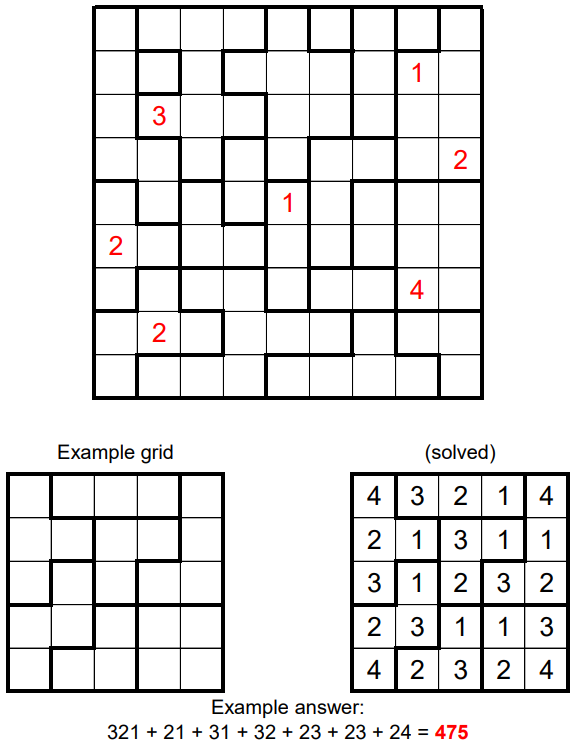

### Puzzle as published
https://www.janestreet.com/puzzles/block-party-3-index/

In [2]:
url='https://www.janestreet.com/puzzles/block-party-3-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Image("https://www.janestreet.com/puzzles/20190903_block_party_3.png",width=300))
display(Markdown('### Puzzle as published\n'+url))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

In [3]:
groups=np.array([[0 ,2 ,2 ,2 ,3 ,4 ,5 ,6 ,7 ],
                 [0 ,1 ,2 ,3 ,3 ,3 ,5 ,7 ,7 ],
                 [0 ,2 ,2 ,2 ,3 ,3 ,5 ,7 ,7 ],
                 [0 ,0 ,2 ,8 ,3 ,9 ,9 ,7 ,7 ],
                 [10,0 ,11,8 ,12,9 ,13,14,14],
                 [10,10,11,11,12,9 ,13,14,14],
                 [10,15,16,16,12,17,17,14,14],
                 [15,15,15,16,16,16,18,19,19],
                 [15,16,16,16,18,18,18,18,19]
                 ],dtype=int)

fixed =np.array([[0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,1,0],
                 [0,3,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,2],
                 [0,0,0,0,1,0,0,0,0],
                 [2,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,4,0],
                 [0,2,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0]
                 ],dtype=int)

def grid_print(groups,numbers):
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    x = np.array((numbers).astype('int').astype('str'))
    x[x=="0"] ="-"
    ax = sns.heatmap(groups,annot=x,cbar=False,cmap="tab20",fmt="",linewidths=1,alpha=.8)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

In [4]:
def exclude(n,i,j,N):
    return [(a,b) for a,b in itertools.product(range(N),repeat=2) if ((a==i and abs(b-j)<n) or (abs(a-i) <n and b==j)) and (a,b) != (i,j)]

def force(n,i,j,N):
    return [(a,b) for a,b in itertools.product(range(N),repeat=2) if ((a==i and abs(b-j)== n) or (abs(a-i) == n and b==j)) ]

def counter(groups,solved):
    group_poss = [[0] for i in range(20)]    
    group = groups[0,0]
    total = 0
    for (i,j),num in np.ndenumerate(solved):  
        if groups[i,j] == group:
            total *=10
            total += num
        else:
            group_poss[group].append(total)
            group = groups[i,j]
            total = num     
    return sum([max(group_poss[i]) for i in range(20)])

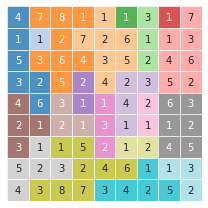

Took 1.4363 seconds
The sum of largest concatenated numbers is : 6,092


In [5]:
start = time.time()
N = 9
#set up the solver and variables.
s = Tactic("qffd").solver()
X = np.array(IntVector("x",N**2),dtype=object).reshape((N,N))

group_sizes = np.unique(groups,return_counts=True)[1]
s += [e == int(fixed[i,j]) for (i,j),e in np.ndenumerate(X) if fixed[i,j]!=0]

for (g,z) in enumerate(group_sizes):
    s += Distinct([e for (i,j),e in np.ndenumerate(X) if groups[i,j]==g])
    s += [And(e>0,e<=int(z)) for (i,j),e in np.ndenumerate(X) if groups[i,j]==g]

for n in range(10):    
    s += [Implies(e == n, And([X[a,b] != n for a,b in exclude(n,i,j,N)])) for (i,j),e in np.ndenumerate(X)]
    s += [Implies(e == n, Or([X[a,b] == n for a,b in force(n,i,j,N)])) for (i,j),e in np.ndenumerate(X)]  

if s.check() == sat:
    m = s.model()
    eval = np.vectorize(lambda x:m.evaluate(x).as_long())
    result =  eval(X)

grid_print(groups,result)
print("Took {:.4f} seconds".format(time.time()- start))
print("The sum of largest concatenated numbers is : {:,.0f}".format(counter(groups,result)))

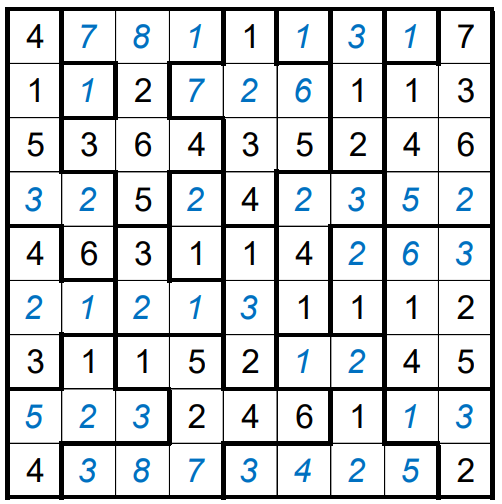

### Puzzle as published
https://www.janestreet.com/puzzles/block-party-3-solution/

In [6]:
url='https://www.janestreet.com/puzzles/block-party-3-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Image("https://www.janestreet.com/puzzles/20190931_block_party_3_sol.png",width=300))
display(Markdown('### Puzzle as published\n'+url))
HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))

In [7]:
solved=np.array([[4,7,8,1,1,1,3,1,7],
                   [1,1,2,7,2,6,1,1,3],
                   [5,3,6,4,3,5,2,4,6],
                   [3,2,5,2,4,2,3,5,2],
                   [4,6,3,1,1,4,2,6,3],
                   [2,1,2,1,3,1,1,1,2],
                   [3,1,1,5,2,1,2,4,5],
                   [5,2,3,2,4,6,1,1,3],
                   [4,3,8,7,3,4,2,5,2]
                 ])